# Problem statement:

Imagine you have a dataset where you have different Instagram features like u sername , Caption , Hashtag , Followers , Time_Since_posted , and likes , now your task is to predict the number of likes and Time Since posted and the rest of the features are your input features. Now you have to build a model which can predict the number of likes and Time Since posted.

In [42]:
# Essential Imports
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Imports for feature engineering
from sklearn.model_selection import train_test_split

# Preprocessors
from sklearn.preprocessing import OneHotEncoder
#Model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
## Evaluation
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Krishnakant-Pal/iNeuron-DS-Assessment/main/Machine-Learning/Insta_reach/instagram_reach_data.csv')

In [27]:
df.head()

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11.0,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2.0,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2.0,25
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3.0,49
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3.0,30


In [5]:
df.drop(['S.No','Unnamed: 0'],inplace=True,axis=1)

In [6]:
df.isnull().sum()

USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [7]:
# dropping the null caption values
df = df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   USERNAME           94 non-null     object
 1   Caption            94 non-null     object
 2   Followers          94 non-null     int64 
 3   Hashtags           94 non-null     object
 4   Time since posted  94 non-null     object
 5   Likes              94 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 5.1+ KB


In [9]:
df['Time since posted'] = df['Time since posted'].astype(str).str.extract('(\d+)').astype(float)
df.head(3)

<ipython-input-9-a82ba5f56df2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time since posted'] = df['Time since posted'].astype(str).str.extract('(\d+)').astype(float)


,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11.0,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2.0,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2.0,25


In [10]:
df.describe()

,Followers,Time since posted,Likes
count,94.000000,94.000000,94.000000
mean,942.627660,3.521277,47.882979
std,1023.894946,3.488009,56.501757
min,11.000000,2.000000,8.000000
25%,231.000000,2.000000,19.000000
50%,593.500000,2.000000,29.500000
75%,1177.000000,3.000000,46.000000
max,4496.000000,24.000000,349.000000


## Visualising Numerical Variable

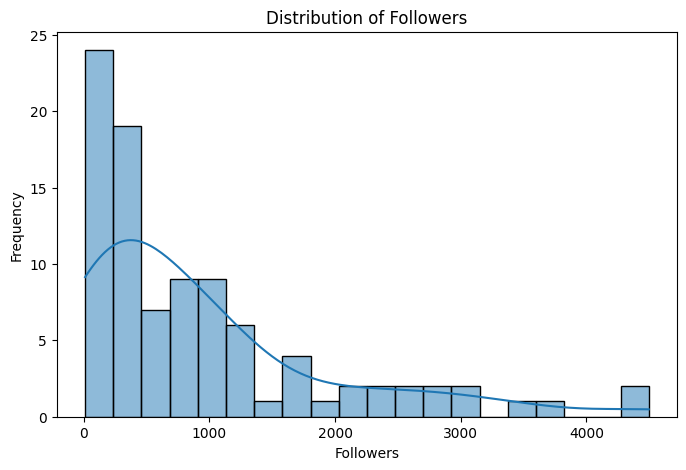

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Followers'], bins=20, kde=True)
plt.title('Distribution of Followers')
plt.xlabel('Followers')
plt.ylabel('Frequency')
plt.show()


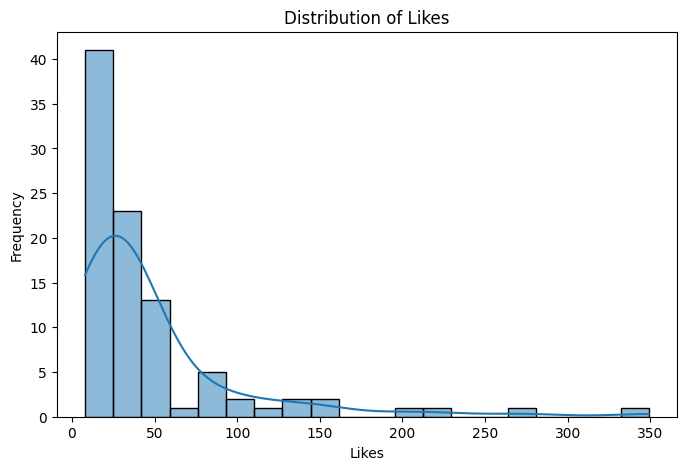

In [12]:
# Distribution of 'Likes'
plt.figure(figsize=(8, 5))
sns.histplot(df['Likes'], bins=20, kde=True)
plt.title('Distribution of Likes')
plt.xlabel('Likes')
plt.ylabel('Frequency')
plt.show()

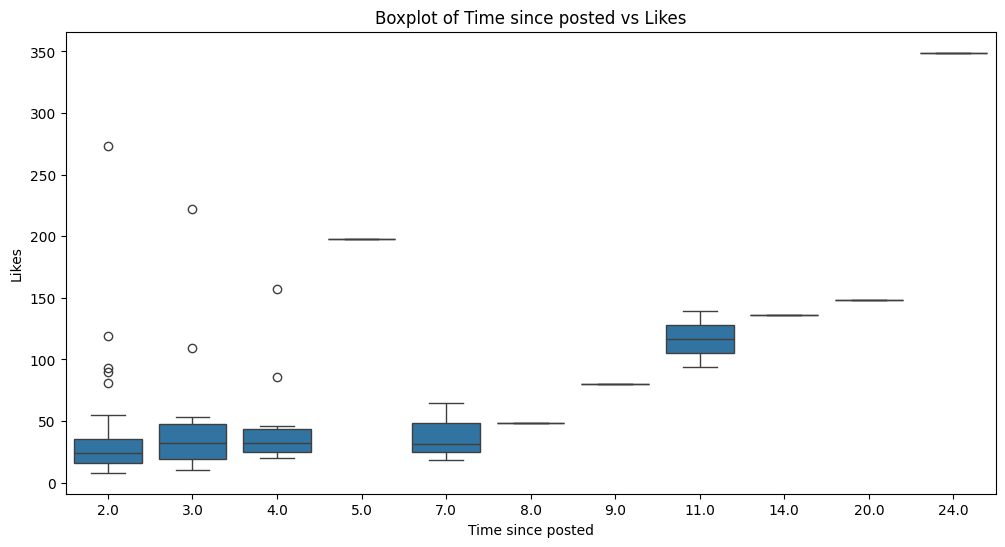

In [13]:
# Boxplot of 'Time since posted' and 'Likes'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Time since posted', y='Likes', data=df)
plt.title('Boxplot of Time since posted vs Likes')
plt.xlabel('Time since posted')
plt.ylabel('Likes')
plt.show()

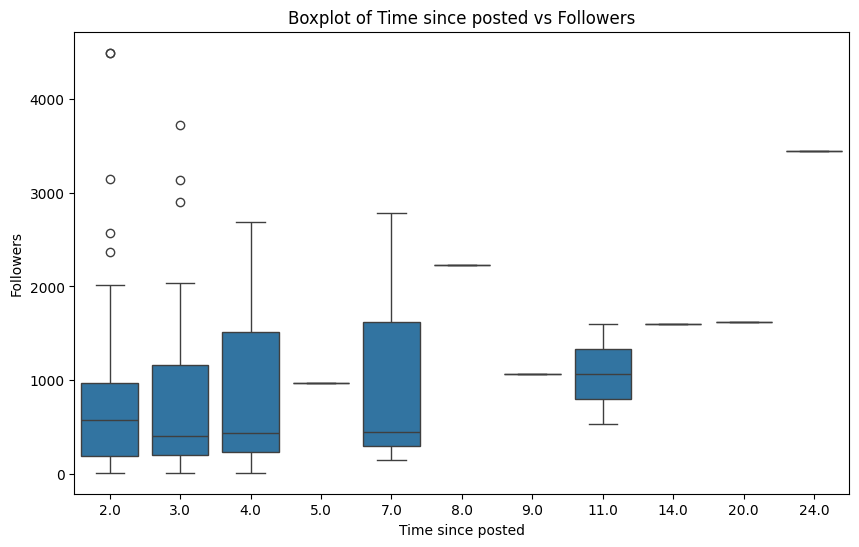

In [14]:
# Boxplot for 'Time since posted' vs 'Followers'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Time since posted', y='Followers', data=df)
plt.title('Boxplot of Time since posted vs Followers')
plt.xlabel('Time since posted')
plt.ylabel('Followers')
plt.show()

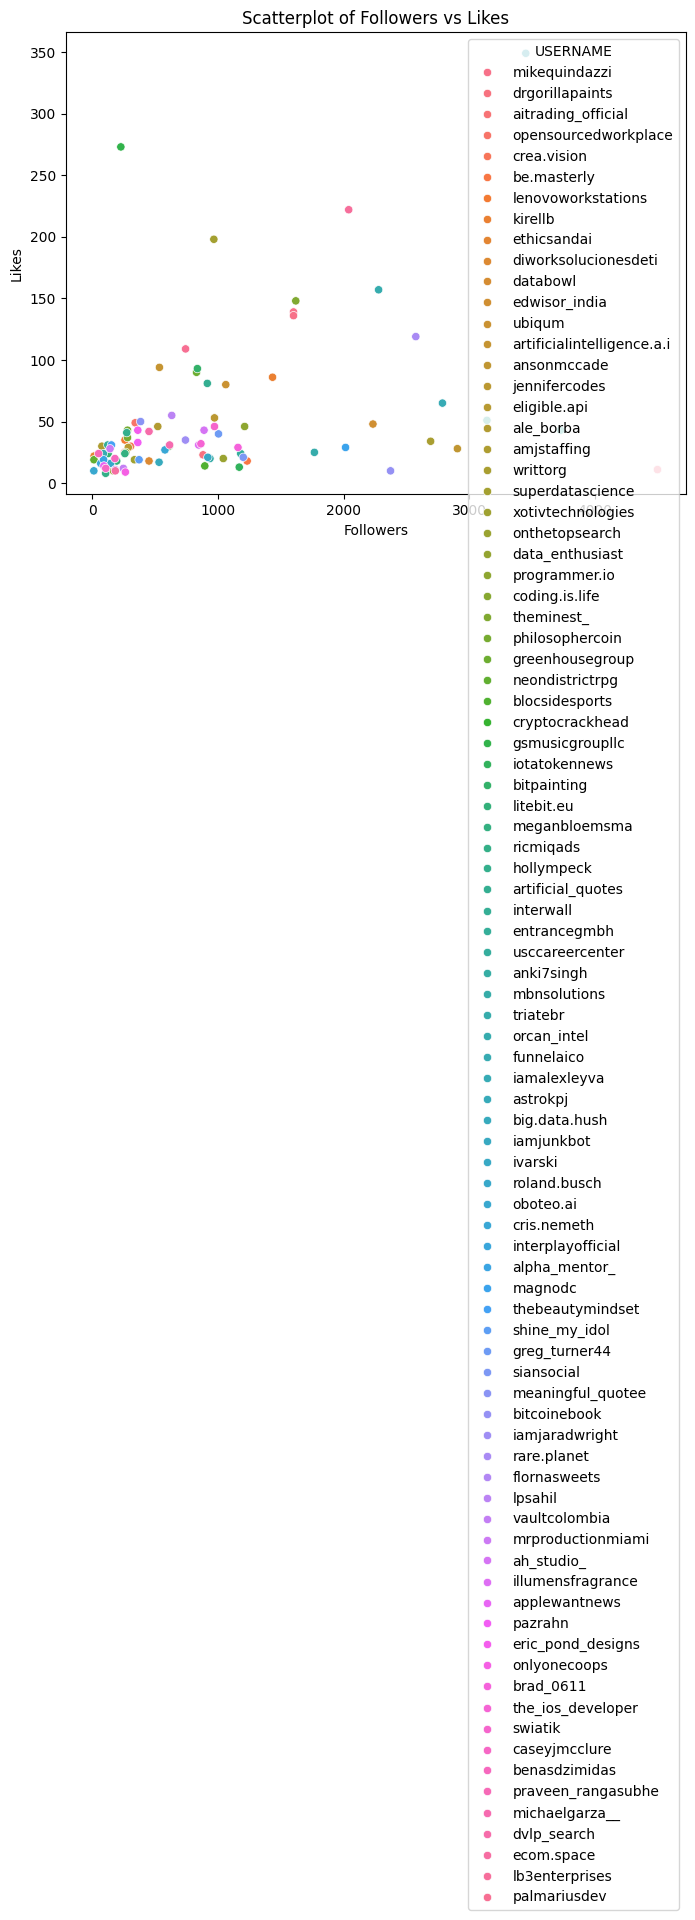

In [15]:
# Relationship between 'Followers' and 'Likes'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Followers', y='Likes', hue='USERNAME', data=df)
plt.title('Scatterplot of Followers vs Likes')
plt.xlabel('Followers')
plt.ylabel('Likes')
plt.show()

<ipython-input-16-a6e91ed1b816>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


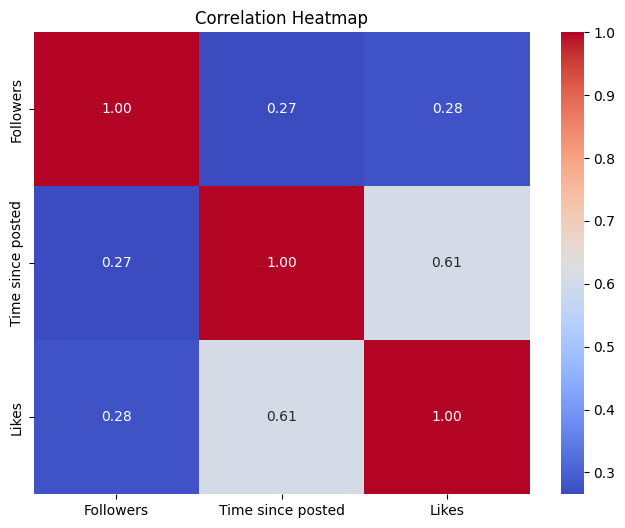

In [16]:
# Correlation Heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

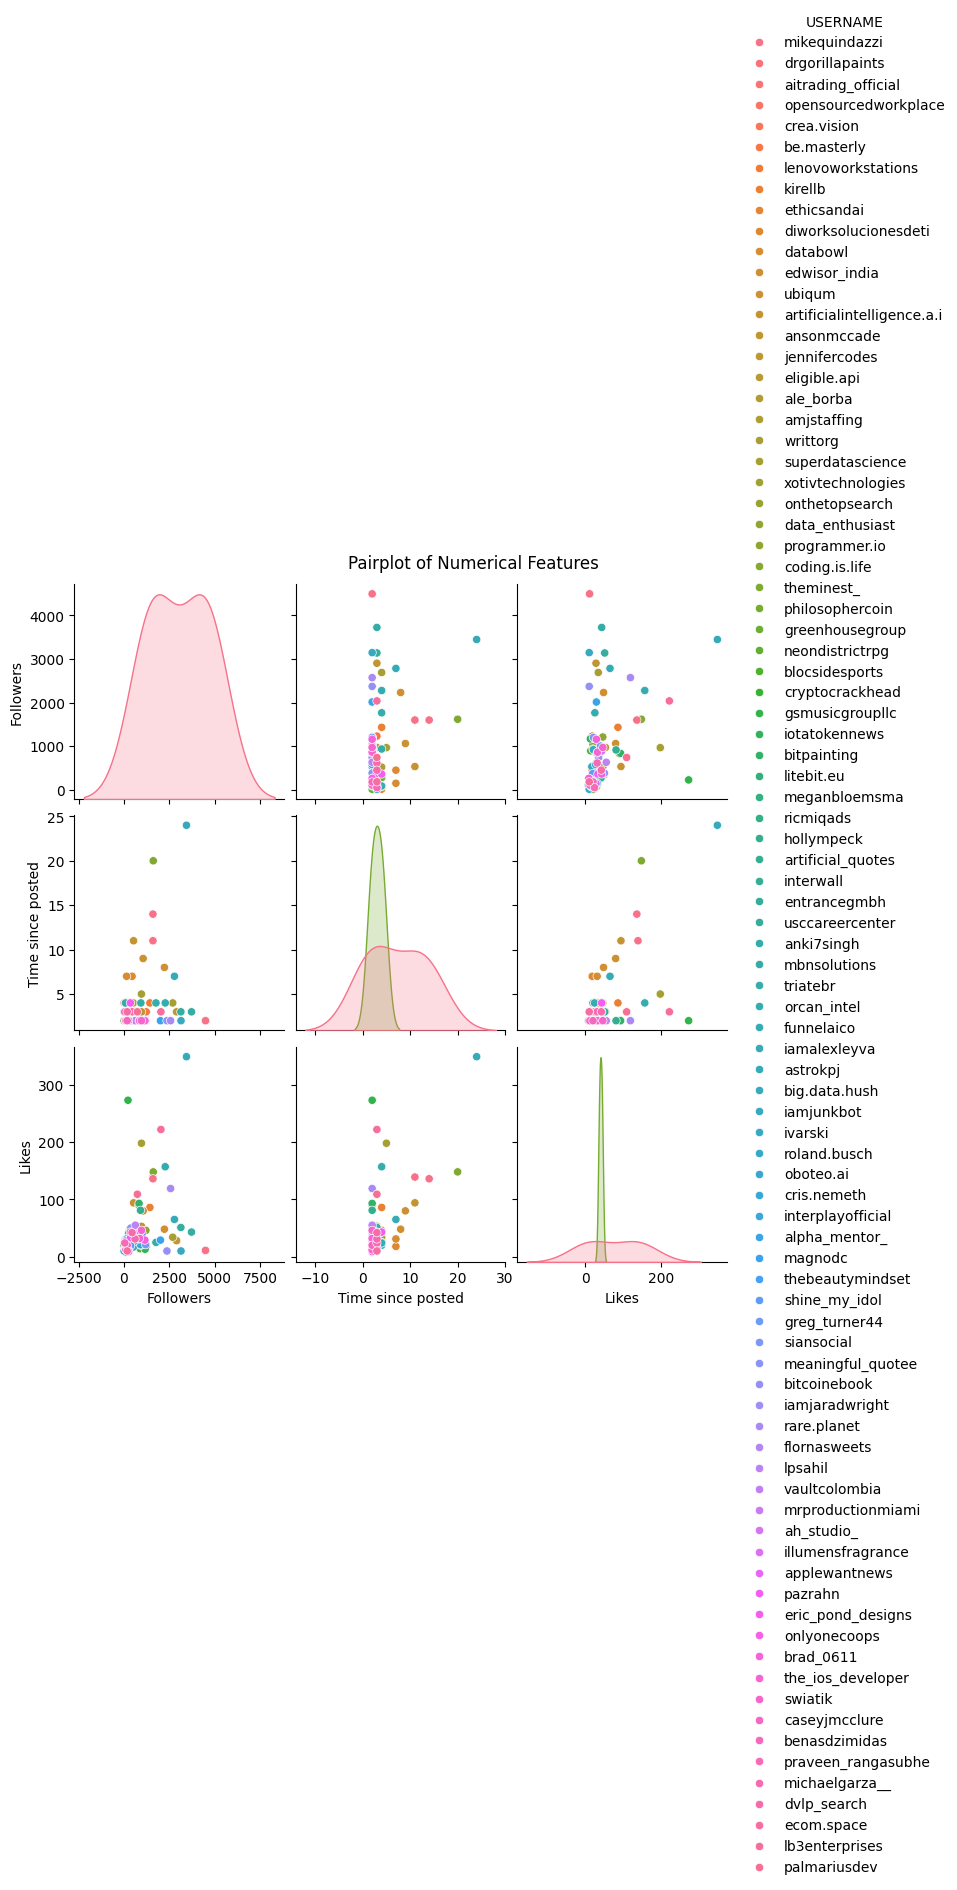

In [17]:
sns.pairplot(df, hue='USERNAME', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

In [18]:
from wordcloud import WordCloud

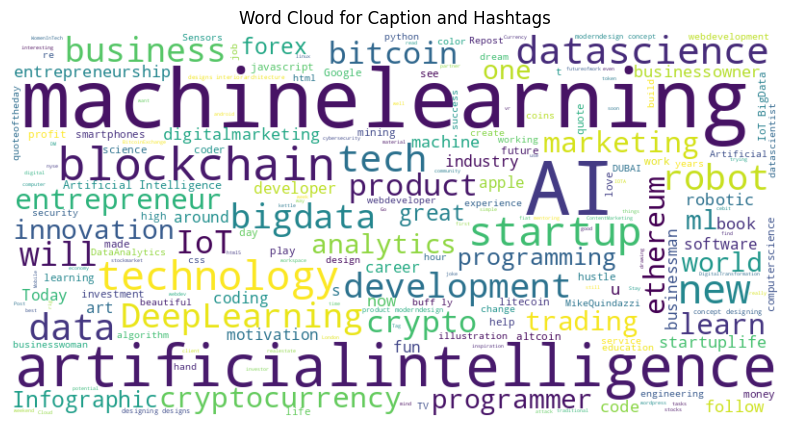

In [19]:
text_data = ' '.join(df['Caption']) + ' ' + ' '.join(df['Hashtags'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Caption and Hashtags')
plt.show()

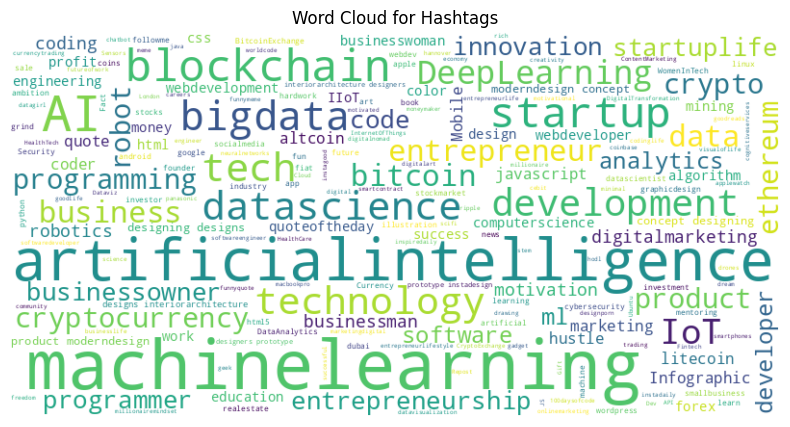

In [20]:
# Word Cloud for Hashtags
hashtags_text = ' '.join(df['Hashtags'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(hashtags_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Hashtags')
plt.show()

In [21]:
features = ['USERNAME', 'Caption', 'Hashtags', 'Followers']
target_likes = 'Likes'
target_time_since_posted = 'Time since posted'

In [22]:
# Spliting the data into training and testing
X = df[features]
y_likes = df[target_likes]
y_time_since_posted = df[target_time_since_posted]
X_train, X_test, y_likes_train, y_likes_test, y_time_since_posted_train, y_time_since_posted_test = train_test_split(X, y_likes, y_time_since_posted, test_size=0.2, random_state=42)


In [25]:
#Preprocess the text features using one-hot encoding
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [26]:
X_train_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Model building

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_regression_model(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    mae_train = mean_absolute_error(y_train, y_train_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_train_pred)

    mae_test = mean_absolute_error(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_test_pred)

    evaluation_results = {
        'Training MSE': mse_train,
        # 'Training RMSE': rmse_train,
        'Training R-squared': r2_train,
        'Test MSE': mse_test,
        # 'Test RMSE': rmse_test,
        'Test R-squared': r2_test
    }
    return evaluation_results

def result_printer(result):
    for metric, value in result.items():
        print(f"{metric}: {value}")


### Model to predict the number of likes

In [58]:
# Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_encoded, y_likes_train)

linear_evaluation_results = evaluate_regression_model(linear_model,X_train_encoded, X_test_encoded, y_likes_train, y_likes_test)
print("Linear Regression Model Evaluation: LIKES")
result_printer(linear_evaluation_results)


Linear Regression Model Evaluation: LIKES
Training MSE: 7.119017389367305e-27
Training R-squared: 1.0
Test MSE: 2295.2229243071724
Test R-squared: -0.4379598547678114


In [59]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_encoded, y_likes_train)
ridge_evaluation_results = evaluate_regression_model(ridge_model, X_train_encoded, X_test_encoded, y_likes_train, y_likes_test)
print("Ridge Model Evaluation: LIKES")
result_printer(ridge_evaluation_results)

Ridge Model Evaluation: LIKES
Training MSE: 141.17584579368634
Training R-squared: 0.9602644201616032
Test MSE: 1787.2914418292683
Test R-squared: -0.11974018510483186


In [60]:
# Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_encoded, y_likes_train)

# Evaluate the Random Forest Regressor model
rf_evaluation_results = evaluate_regression_model(rf_model,X_train_encoded, X_test_encoded, y_likes_train, y_likes_test)
print("Random Forest Regressor Model Evaluation: LIKES")
result_printer(rf_evaluation_results)


Random Forest Regressor Model Evaluation: LIKES
Training MSE: 563.7247533333334
Training R-squared: 0.8413331273701569
Test MSE: 2262.30442631579
Test R-squared: -0.4173363771571772


In [61]:
# AdaBoost
likes_adaboost_model = AdaBoostRegressor(n_estimators=50, random_state=42)
likes_adaboost_model.fit(X_train_encoded, y_likes_train)

adaboost_evaluation_results = evaluate_regression_model(adaboost_model, X_train_encoded, X_test_encoded, y_likes_train, y_likes_test)
print("AdaBoost Model Evaluation:")
result_printer(adaboost_evaluation_results)

AdaBoost Model Evaluation:
Training MSE: 965.3009372637945
Training R-squared: 0.7283048509815258
Test MSE: 1609.4092373791625
Test R-squared: -0.008296775330566275


### Model to predict the time since Posted

In [62]:
# Random Forest Regressor model
time_rf_model = RandomForestRegressor(random_state=42)
time_rf_model.fit(X_train_encoded, y_likes_train)

# Evaluate the Random Forest Regressor model
time_rf_evaluation_results = evaluate_regression_model(rf_model,X_train_encoded, X_test_encoded, y_time_since_posted_train, y_time_since_posted_test)
print("Random Forest Regressor Model Evaluation: Time since Posted")
result_printer(time_rf_evaluation_results)


Random Forest Regressor Model Evaluation: Time since Posted
Training MSE: 2555.582086666667
Training R-squared: -212.20522718171574
Test MSE: 312.7391631578947
Test R-squared: -25.867881461208945
